<a href="https://colab.research.google.com/github/anushka012/Automated-Text-Scoring-Model/blob/main/Analysis_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from numpy import newaxis
import math
import sys

In [ ]:
dataset = pd.read_csv("/content/data.csv")

In [ ]:
print(dataset)

       priceDate itemName         state  ... maxPrice  modalPrice   priceUnit
0     2005-04-11   Potato  NCT of Delhi  ...    663.0       475.0  Rs/Quintal
1     2005-04-12   Potato  NCT of Delhi  ...    688.0       500.0  Rs/Quintal
2     2005-04-13   Potato  NCT of Delhi  ...    688.0       488.0  Rs/Quintal
3     2005-04-16   Potato  NCT of Delhi  ...    650.0       475.0  Rs/Quintal
4     2005-04-18   Potato  NCT of Delhi  ...    650.0       475.0  Rs/Quintal
...          ...      ...           ...  ...      ...         ...         ...
3800  2018-08-27   Potato  NCT of Delhi  ...   2400.0      1410.0  Rs/Quintal
3801  2018-08-28   Potato  NCT of Delhi  ...   2400.0      1410.0  Rs/Quintal
3802  2018-08-29   Potato  NCT of Delhi  ...   2400.0      1410.0  Rs/Quintal
3803  2018-08-30   Potato  NCT of Delhi  ...   2400.0      1410.0  Rs/Quintal
3804  2018-08-31   Potato  NCT of Delhi  ...   2400.0      1411.0  Rs/Quintal

[3805 rows x 11 columns]


In [ ]:
dataset.drop(["itemName","state","mandiName","unitArrivals","variety","priceUnit"],axis=1,inplace=True)
dataset.set_index("priceDate",inplace=True)
dataset
data = dataset.interpolate()
print(data)

            arrivals  minPrice  maxPrice  modalPrice
priceDate                                           
2005-04-11     106.0     300.0     663.0       475.0
2005-04-12    1745.0     325.0     688.0       500.0
2005-04-13    1233.0     300.0     688.0       488.0
2005-04-16    1654.0     350.0     650.0       475.0
2005-04-18      26.0     350.0     650.0       475.0
...              ...       ...       ...         ...
2018-08-27      97.1     700.0    2400.0      1410.0
2018-08-28     973.5     700.0    2400.0      1410.0
2018-08-29    1317.9     700.0    2400.0      1410.0
2018-08-30    1375.3     700.0    2400.0      1410.0
2018-08-31    1121.0     700.0    2400.0      1411.0

[3805 rows x 4 columns]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3805 entries, 2005-04-11 to 2018-08-31
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   arrivals    3805 non-null   float64
 1   minPrice    3805 non-null   float64
 2   maxPrice    3805 non-null   float64
 3   modalPrice  3805 non-null   float64
dtypes: float64(4)
memory usage: 148.6+ KB


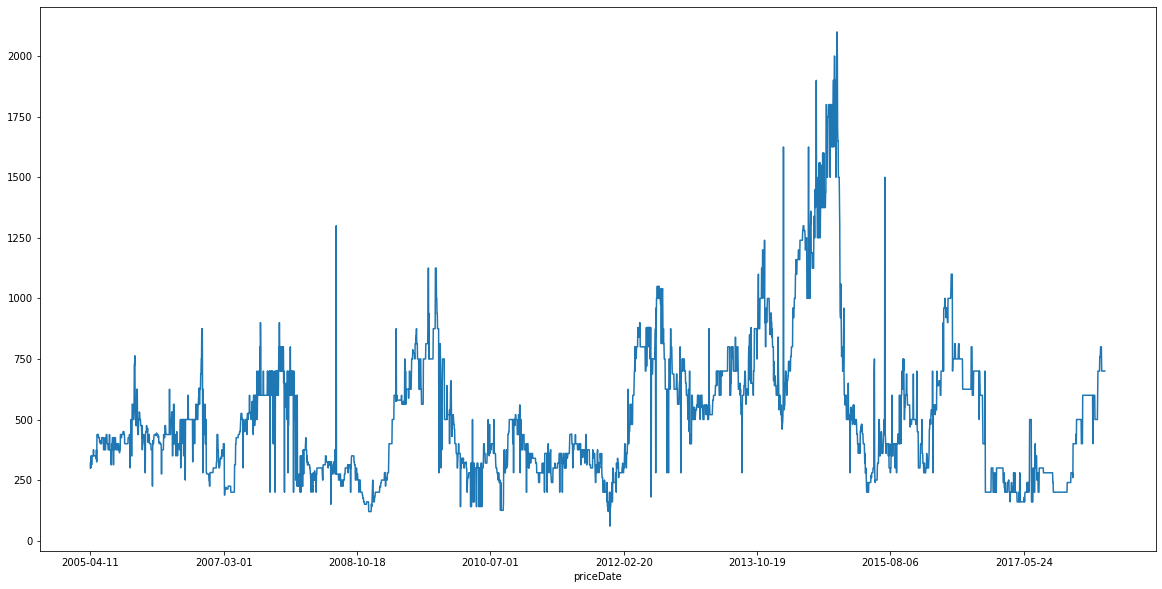

In [ ]:
data['minPrice'].plot(figsize=(20,10))

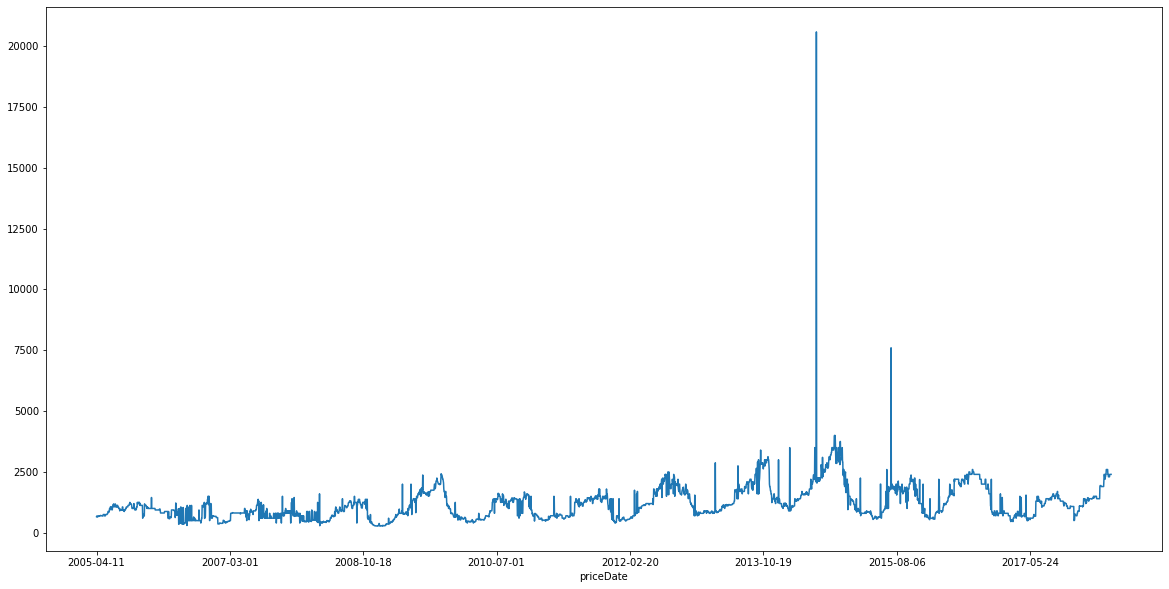

In [ ]:
data['maxPrice'].plot(figsize=(20,10))

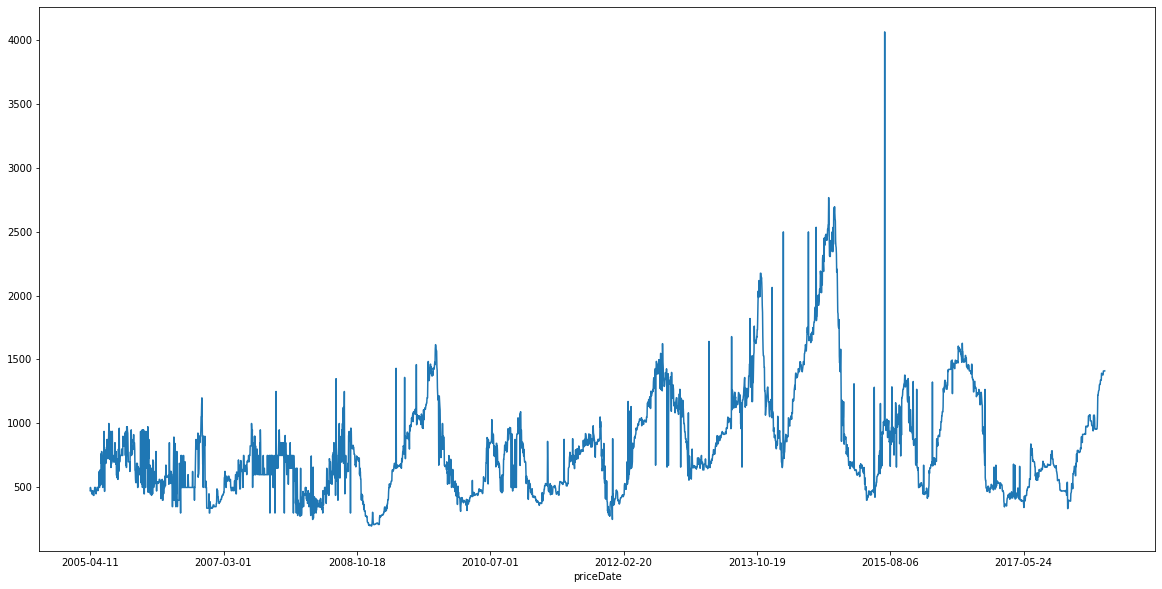

In [ ]:
data['modalPrice'].plot(figsize=(20,10))

In [ ]:
days = 30
days = int(days)

In [ ]:
data.rolling(days).mean().tail(10) #30days moving mean

,arrivals,minPrice,maxPrice,modalPrice
priceDate,,,,
2018-08-21,1115.886667,646.000000,2228.000000,1175.633333
2018-08-22,1136.293333,649.333333,2240.000000,1186.900000
2018-08-23,1095.696667,656.000000,2253.333333,1201.033333
2018-08-24,1098.590000,662.666667,2266.666667,1215.166667
2018-08-25,1099.346667,669.333333,2283.333333,1230.333333
2018-08-27,1065.820000,676.000000,2300.000000,1245.500000
2018-08-28,1094.683333,682.666667,2316.666667,1260.666667
2018-08-29,1089.946667,689.333333,2333.333333,1275.833333
2018-08-30,1095.090000,696.000000,2350.000000,1291.000000


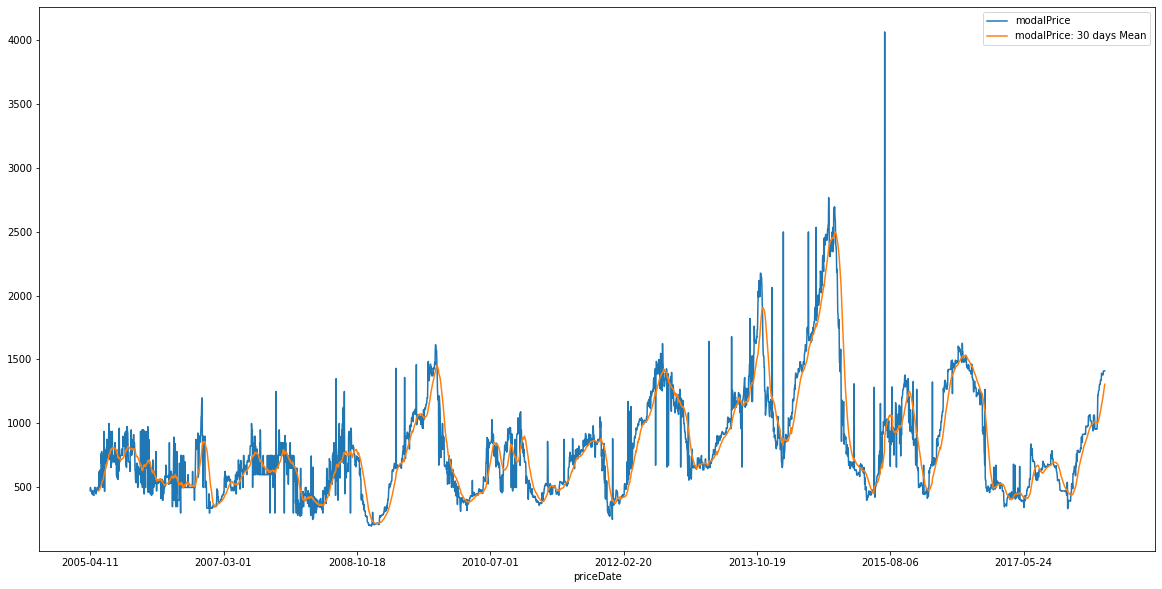

In [ ]:
data['modalPrice: 30 days Mean'] = data['modalPrice'].rolling(days).mean()
data[['modalPrice','modalPrice: 30 days Mean']].plot(figsize=(20,10))

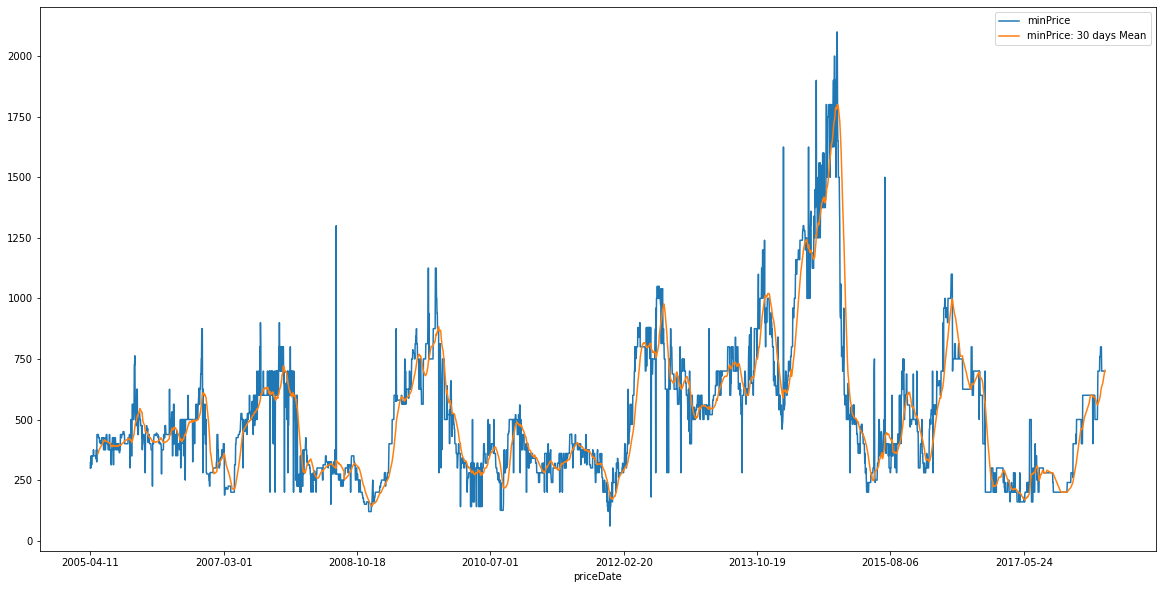

In [ ]:
data['minPrice: 30 days Mean'] = data['minPrice'].rolling(days).mean()
data[['minPrice','minPrice: 30 days Mean']].plot(figsize=(20,10))

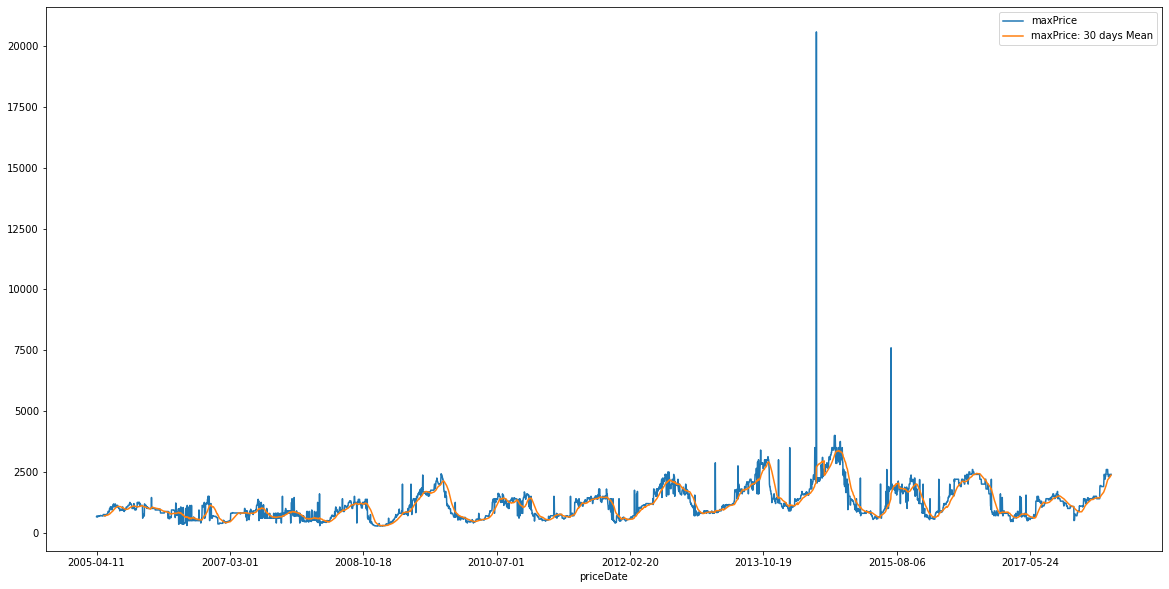

In [ ]:
data['maxPrice: 30 days Mean'] = data['maxPrice'].rolling(days).mean()
data[['maxPrice','maxPrice: 30 days Mean']].plot(figsize=(20,10))

In [ ]:
from statsmodels.tsa.stattools import adfuller
from pandas.util._decorators import Appender

In [ ]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-value : ",dftest[1])
    print("3. No. of Lags : ",dftest[2])
    print("4. No. of Observation used for ADF Regression and Critical Calues : ",dftest[3])
    print("5. Critical Values : ")
    for key, val in dftest[4].items():
        print("\t",key,": ", val)

In [ ]:
#Next 30 Day Prediction of Modal Price

In [ ]:
from pmdarima import auto_arima

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
stepwise_fit = auto_arima(data['modalPrice'],trace=True,suppress_warnings=True)
#stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=47128.397, Time=7.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=48461.454, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=47624.340, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=47144.187, Time=1.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=48459.465, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=47147.472, Time=1.65 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=47146.795, Time=3.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=47129.101, Time=6.58 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=47143.913, Time=9.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=47145.583, Time=2.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=47149.487, Time=2.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=47144.541, Time=4.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=47131.032, Time=8.20 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=47126.458, Time=2.82 sec
 ARIMA(1,1,2)(0,0,0

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
print(data.shape)
train = data.iloc[:-30]
test = data.iloc[-30:]
print(train.shape,test.shape)

(3805, 7)
(3775, 7) (30, 7)


In [ ]:
#Training Model

model = ARIMA(train['modalPrice'],order=(2,1,2))
model = model.fit()

In [ ]:
model2 = ARIMA(data['modalPrice'],order=(2,1,2))
model2 = model2.fit()
data.tail()

,arrivals,minPrice,maxPrice,modalPrice,modalPrice: 30 days Mean,minPrice: 30 days Mean,maxPrice: 30 days Mean
priceDate,,,,,,,
2018-08-27,97.1,700.0,2400.0,1410.0,1245.500000,676.000000,2300.000000
2018-08-28,973.5,700.0,2400.0,1410.0,1260.666667,682.666667,2316.666667
2018-08-29,1317.9,700.0,2400.0,1410.0,1275.833333,689.333333,2333.333333
2018-08-30,1375.3,700.0,2400.0,1410.0,1291.000000,696.000000,2350.000000
2018-08-31,1121.0,700.0,2400.0,1411.0,1306.066667,702.666667,2366.666667


In [ ]:
index_future_dates = pd.date_range(start='2018-09-01',end='2018-09-30')
modal_price_pred = model2.predict(start=len(data),end=len(data)+29,typ='levels').rename('modalPrice')
modal_price_pred.index=index_future_dates
print("ARIMA Model - Modal Price Prediction for next 30 days:\n")
print(modal_price_pred)

ARIMA Model - Modal Price Prediction for next 30 days:

2018-09-01    1415.988241
2018-09-02    1418.370360
2018-09-03    1420.408068
2018-09-04    1422.281760
2018-09-05    1424.016572
2018-09-06    1425.625139
2018-09-07    1427.118255
2018-09-08    1428.505738
2018-09-09    1429.796568
2018-09-10    1430.998962
2018-09-11    1432.120436
2018-09-12    1433.167871
2018-09-13    1434.147559
2018-09-14    1435.065260
2018-09-15    1435.926244
2018-09-16    1436.735331
2018-09-17    1437.496933
2018-09-18    1438.215087
2018-09-19    1438.893486
2018-09-20    1439.535510
2018-09-21    1440.144250
2018-09-22    1440.722537
2018-09-23    1441.272959
2018-09-24    1441.797884
2018-09-25    1442.299481
2018-09-26    1442.779732
2018-09-27    1443.240452
2018-09-28    1443.683300
2018-09-29    1444.109797
2018-09-30    1444.521333
Freq: D, Name: modalPrice, dtype: float64


In [ ]:
#Next 30 Day Prediction of Min Price

In [ ]:
ad_test(data['minPrice'])

1. ADF :  -3.531918693967959
2. P-value :  0.007204210600476384
3. No. of Lags :  11
4. No. of Observation used for ADF Regression and Critical Calues :  3793
5. Critical Values : 
	 1% :  -3.432075212507756
	 5% :  -2.862302303994175
	 10% :  -2.5671757844911003


In [ ]:
stepwise_fit = auto_arima(data['minPrice'],trace=True,suppress_warnings=True)
#stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=43669.810, Time=4.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=44629.546, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=43935.720, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=43680.758, Time=1.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=44627.552, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=43671.196, Time=3.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=43667.976, Time=3.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=43673.786, Time=1.96 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=43795.544, Time=0.41 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=43669.714, Time=3.83 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=43734.592, Time=0.46 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=43671.897, Time=3.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=43666.020, Time=0.93 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=43671.826, Time=0.58 sec
 ARIMA(2,1,0)(0,0,0

In [ ]:
print(data.shape)
train = data.iloc[:-30]
test = data.iloc[-30:]
print(train.shape,test.shape)

(3805, 7)
(3775, 7) (30, 7)


In [ ]:
#Training Model

modell = ARIMA(train['minPrice'],order=(2,1,1))
modell = modell.fit()

In [ ]:
model3 = ARIMA(data['minPrice'],order=(2,1,1))
model3 = model3.fit()
data.tail()

,arrivals,minPrice,maxPrice,modalPrice,modalPrice: 30 days Mean,minPrice: 30 days Mean,maxPrice: 30 days Mean
priceDate,,,,,,,
2018-08-27,97.1,700.0,2400.0,1410.0,1245.500000,676.000000,2300.000000
2018-08-28,973.5,700.0,2400.0,1410.0,1260.666667,682.666667,2316.666667
2018-08-29,1317.9,700.0,2400.0,1410.0,1275.833333,689.333333,2333.333333
2018-08-30,1375.3,700.0,2400.0,1410.0,1291.000000,696.000000,2350.000000
2018-08-31,1121.0,700.0,2400.0,1411.0,1306.066667,702.666667,2366.666667


In [ ]:
index_future_dates = pd.date_range(start='2018-09-01',end='2018-09-30')
min_price_pred = model3.predict(start=len(data),end=len(data)+29,typ='levels').rename('minPrice')
min_price_pred.index=index_future_dates
print("ARIMA Model - Min Price Prediction for next 30 days:\n")
print(min_price_pred)

ARIMA Model - Min Price Prediction for next 30 days:

2018-09-01    700.701053
2018-09-02    700.888143
2018-09-03    701.043019
2018-09-04    701.158170
2018-09-05    701.264991
2018-09-06    701.367838
2018-09-07    701.469507
2018-09-08    701.570724
2018-09-09    701.671792
2018-09-10    701.772807
2018-09-11    701.873803
2018-09-12    701.974792
2018-09-13    702.075779
2018-09-14    702.176765
2018-09-15    702.277752
2018-09-16    702.378738
2018-09-17    702.479724
2018-09-18    702.580710
2018-09-19    702.681696
2018-09-20    702.782681
2018-09-21    702.883667
2018-09-22    702.984653
2018-09-23    703.085639
2018-09-24    703.186625
2018-09-25    703.287611
2018-09-26    703.388597
2018-09-27    703.489583
2018-09-28    703.590569
2018-09-29    703.691555
2018-09-30    703.792541
Freq: D, Name: minPrice, dtype: float64


In [ ]:
#Next 30 Day Prediction of Max Price

In [ ]:
ad_test(data['maxPrice'])

1. ADF :  -3.836805185807123
2. P-value :  0.002552417807563282
3. No. of Lags :  11
4. No. of Observation used for ADF Regression and Critical Calues :  3793
5. Critical Values : 
	 1% :  -3.432075212507756
	 5% :  -2.862302303994175
	 10% :  -2.5671757844911003


In [ ]:
stepwise_fit = auto_arima(data['maxPrice'],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=56020.504, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=57962.860, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=56954.994, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=56014.011, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=57960.863, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=56015.897, Time=2.73 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=56015.890, Time=2.85 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=56017.490, Time=5.27 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=56012.167, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=56014.053, Time=0.85 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=56015.094, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=56953.003, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=56016.544, Time=0.33 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 15.583 seconds


In [ ]:
print(data.shape)
train = data.iloc[:-30]
test = data.iloc[-30:]
print(train.shape,test.shape)

(3805, 7)
(3775, 7) (30, 7)


In [ ]:
#MODEL TRAINING
modelll = ARIMA(train['maxPrice'],order=(0,1,1))
modelll = modelll.fit()

In [ ]:
model4 = ARIMA(data['maxPrice'],order=(0,1,1))
model4 = model4.fit()
data.tail()

,arrivals,minPrice,maxPrice,modalPrice,modalPrice: 30 days Mean,minPrice: 30 days Mean,maxPrice: 30 days Mean
priceDate,,,,,,,
2018-08-27,97.1,700.0,2400.0,1410.0,1245.500000,676.000000,2300.000000
2018-08-28,973.5,700.0,2400.0,1410.0,1260.666667,682.666667,2316.666667
2018-08-29,1317.9,700.0,2400.0,1410.0,1275.833333,689.333333,2333.333333
2018-08-30,1375.3,700.0,2400.0,1410.0,1291.000000,696.000000,2350.000000
2018-08-31,1121.0,700.0,2400.0,1411.0,1306.066667,702.666667,2366.666667


In [ ]:
index_future_dates = pd.date_range(start='2018-09-01',end='2018-09-30')
max_price_pred = model4.predict(start=len(data),end=len(data)+29,typ='levels').rename('maxPrice')
max_price_pred.index=index_future_dates
print("ARIMA Model - Max Price Prediction for next 30 days:\n")
print(max_price_pred)

ARIMA Model - Max Price Prediction for next 30 days:

2018-09-01    2390.815342
2018-09-02    2391.266820
2018-09-03    2391.718298
2018-09-04    2392.169777
2018-09-05    2392.621255
2018-09-06    2393.072733
2018-09-07    2393.524211
2018-09-08    2393.975689
2018-09-09    2394.427167
2018-09-10    2394.878645
2018-09-11    2395.330123
2018-09-12    2395.781601
2018-09-13    2396.233080
2018-09-14    2396.684558
2018-09-15    2397.136036
2018-09-16    2397.587514
2018-09-17    2398.038992
2018-09-18    2398.490470
2018-09-19    2398.941948
2018-09-20    2399.393426
2018-09-21    2399.844904
2018-09-22    2400.296383
2018-09-23    2400.747861
2018-09-24    2401.199339
2018-09-25    2401.650817
2018-09-26    2402.102295
2018-09-27    2402.553773
2018-09-28    2403.005251
2018-09-29    2403.456729
2018-09-30    2403.908207
Freq: D, Name: maxPrice, dtype: float64


In [ ]:
print(data)

            arrivals  minPrice  ...  minPrice: 30 days Mean  maxPrice: 30 days Mean
priceDate                       ...                                                
2005-04-11     106.0     300.0  ...                     NaN                     NaN
2005-04-12    1745.0     325.0  ...                     NaN                     NaN
2005-04-13    1233.0     300.0  ...                     NaN                     NaN
2005-04-16    1654.0     350.0  ...                     NaN                     NaN
2005-04-18      26.0     350.0  ...                     NaN                     NaN
...              ...       ...  ...                     ...                     ...
2018-08-27      97.1     700.0  ...              676.000000             2300.000000
2018-08-28     973.5     700.0  ...              682.666667             2316.666667
2018-08-29    1317.9     700.0  ...              689.333333             2333.333333
2018-08-30    1375.3     700.0  ...              696.000000             2350

In [ ]:
print(min_price_pred)

2018-09-01    700.701053
2018-09-02    700.888143
2018-09-03    701.043019
2018-09-04    701.158170
2018-09-05    701.264991
2018-09-06    701.367838
2018-09-07    701.469507
2018-09-08    701.570724
2018-09-09    701.671792
2018-09-10    701.772807
2018-09-11    701.873803
2018-09-12    701.974792
2018-09-13    702.075779
2018-09-14    702.176765
2018-09-15    702.277752
2018-09-16    702.378738
2018-09-17    702.479724
2018-09-18    702.580710
2018-09-19    702.681696
2018-09-20    702.782681
2018-09-21    702.883667
2018-09-22    702.984653
2018-09-23    703.085639
2018-09-24    703.186625
2018-09-25    703.287611
2018-09-26    703.388597
2018-09-27    703.489583
2018-09-28    703.590569
2018-09-29    703.691555
2018-09-30    703.792541
Freq: D, Name: minPrice, dtype: float64


In [ ]:
print(max_price_pred)

2018-09-01    2390.815342
2018-09-02    2391.266820
2018-09-03    2391.718298
2018-09-04    2392.169777
2018-09-05    2392.621255
2018-09-06    2393.072733
2018-09-07    2393.524211
2018-09-08    2393.975689
2018-09-09    2394.427167
2018-09-10    2394.878645
2018-09-11    2395.330123
2018-09-12    2395.781601
2018-09-13    2396.233080
2018-09-14    2396.684558
2018-09-15    2397.136036
2018-09-16    2397.587514
2018-09-17    2398.038992
2018-09-18    2398.490470
2018-09-19    2398.941948
2018-09-20    2399.393426
2018-09-21    2399.844904
2018-09-22    2400.296383
2018-09-23    2400.747861
2018-09-24    2401.199339
2018-09-25    2401.650817
2018-09-26    2402.102295
2018-09-27    2402.553773
2018-09-28    2403.005251
2018-09-29    2403.456729
2018-09-30    2403.908207
Freq: D, Name: maxPrice, dtype: float64


In [ ]:
print(modal_price_pred)

2018-09-01    1415.988241
2018-09-02    1418.370360
2018-09-03    1420.408068
2018-09-04    1422.281760
2018-09-05    1424.016572
2018-09-06    1425.625139
2018-09-07    1427.118255
2018-09-08    1428.505738
2018-09-09    1429.796568
2018-09-10    1430.998962
2018-09-11    1432.120436
2018-09-12    1433.167871
2018-09-13    1434.147559
2018-09-14    1435.065260
2018-09-15    1435.926244
2018-09-16    1436.735331
2018-09-17    1437.496933
2018-09-18    1438.215087
2018-09-19    1438.893486
2018-09-20    1439.535510
2018-09-21    1440.144250
2018-09-22    1440.722537
2018-09-23    1441.272959
2018-09-24    1441.797884
2018-09-25    1442.299481
2018-09-26    1442.779732
2018-09-27    1443.240452
2018-09-28    1443.683300
2018-09-29    1444.109797
2018-09-30    1444.521333
Freq: D, Name: modalPrice, dtype: float64


In [ ]:
df1 = pd.DataFrame(min_price_pred)
df1 = df1.reset_index()

df2 = pd.DataFrame(max_price_pred)
df2 = df2.reset_index()

df3 = pd.DataFrame(modal_price_pred)
df3 = df3.reset_index()

In [ ]:
dfinal = pd.concat([df1,df2,df3], join = 'outer', axis = 1)
print(dfinal)

        index    minPrice      index     maxPrice      index   modalPrice
0  2018-09-01  700.701053 2018-09-01  2390.815342 2018-09-01  1415.988241
1  2018-09-02  700.888143 2018-09-02  2391.266820 2018-09-02  1418.370360
2  2018-09-03  701.043019 2018-09-03  2391.718298 2018-09-03  1420.408068
3  2018-09-04  701.158170 2018-09-04  2392.169777 2018-09-04  1422.281760
4  2018-09-05  701.264991 2018-09-05  2392.621255 2018-09-05  1424.016572
5  2018-09-06  701.367838 2018-09-06  2393.072733 2018-09-06  1425.625139
6  2018-09-07  701.469507 2018-09-07  2393.524211 2018-09-07  1427.118255
7  2018-09-08  701.570724 2018-09-08  2393.975689 2018-09-08  1428.505738
8  2018-09-09  701.671792 2018-09-09  2394.427167 2018-09-09  1429.796568
9  2018-09-10  701.772807 2018-09-10  2394.878645 2018-09-10  1430.998962
10 2018-09-11  701.873803 2018-09-11  2395.330123 2018-09-11  1432.120436
11 2018-09-12  701.974792 2018-09-12  2395.781601 2018-09-12  1433.167871
12 2018-09-13  702.075779 2018-09-13  

In [ ]:
preds = dfinal.drop(['index'],axis=1)

In [ ]:
print(preds)

      minPrice     maxPrice   modalPrice
0   700.701053  2390.815342  1415.988241
1   700.888143  2391.266820  1418.370360
2   701.043019  2391.718298  1420.408068
3   701.158170  2392.169777  1422.281760
4   701.264991  2392.621255  1424.016572
5   701.367838  2393.072733  1425.625139
6   701.469507  2393.524211  1427.118255
7   701.570724  2393.975689  1428.505738
8   701.671792  2394.427167  1429.796568
9   701.772807  2394.878645  1430.998962
10  701.873803  2395.330123  1432.120436
11  701.974792  2395.781601  1433.167871
12  702.075779  2396.233080  1434.147559
13  702.176765  2396.684558  1435.065260
14  702.277752  2397.136036  1435.926244
15  702.378738  2397.587514  1436.735331
16  702.479724  2398.038992  1437.496933
17  702.580710  2398.490470  1438.215087
18  702.681696  2398.941948  1438.893486
19  702.782681  2399.393426  1439.535510
20  702.883667  2399.844904  1440.144250
21  702.984653  2400.296383  1440.722537
22  703.085639  2400.747861  1441.272959
23  703.186625  

In [ ]:
data_final['minPrice'] = data_final['minPrice'].astype(int)
data_final['maxPrice'] = data_final['maxPrice'].astype(int)
data_final['modalPrice'] = data_final['modalPrice'].astype(int)
print(data_final)

    priceDate  minPrice  maxPrice  modalPrice
0  2018-09-01       700      2390        1415
1  2018-09-02       700      2391        1418
2  2018-09-03       701      2391        1420
3  2018-09-04       701      2392        1422
4  2018-09-05       701      2392        1424
5  2018-09-06       701      2393        1425
6  2018-09-07       701      2393        1427
7  2018-09-08       701      2393        1428
8  2018-09-09       701      2394        1429
9  2018-09-10       701      2394        1430
10 2018-09-11       701      2395        1432
11 2018-09-12       701      2395        1433
12 2018-09-13       702      2396        1434
13 2018-09-14       702      2396        1435
14 2018-09-15       702      2397        1435
15 2018-09-16       702      2397        1436
16 2018-09-17       702      2398        1437
17 2018-09-18       702      2398        1438
18 2018-09-19       702      2398        1438
19 2018-09-20       702      2399        1439
20 2018-09-21       702      2399 

In [ ]:
data_final.to_csv("/content/prediction.xlsx",date_format="%Y.%m.%d")